<b>¡Hola Cesar!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Antención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que deberás atender para aprobar la revisión.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Es factible que, a lo largo del proceso de revisión, quieras dejarme comentarios. Si es el caso, por favor realízalo dentro de celdas azules como esta.
</div>
Respecto del proceso de revisión, tu proyecto será aceptado una vez que los comentarios en rojo hayan sido atendidos.
¡Empecemos!

# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

1. Hay que importar de primera instancia nuestra libreria `pandas` , `numpy`
1. Lo primero que hay que hacer es convertir/leer en DataFrames  todos nuestros archivos csv para poder trabajar maas rapido con todos los datos.
2. Hay que utilizar el metodo `info()` con el respectivo nombre del DataFrame por archivo para poder vizualisar todos los tipos de datos y si hay algun tipo de dato nulo, utilizar los parametros necesarios para una buena extracion de ese tipo de informacion 

In [564]:
# importar librerías
import pandas as pd

import matplotlib.pyplot as plt

In [565]:
# leer conjuntos de datos en los DataFrames
instacart=pd.read_csv('./datasets/instacart_orders.csv', sep=';')
products=pd.read_csv('./datasets/products.csv',sep=';')
order_products=pd.read_csv('./datasets/order_products.csv',sep=';')
aisles=pd.read_csv('./datasets/aisles.csv',sep=';')
departments=pd.read_csv('./datasets/departments.csv',sep=';')

In [566]:
# mostrar información del DataFrame
instacart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [567]:
# mostrar información del DataFrame
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [568]:
# mostrar información del DataFrame
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [569]:
# mostrar información del DataFrame
print(aisles.head(3))
aisles.info()

   aisle_id                  aisle
0         1  prepared soups salads
1         2      specialty cheeses
2         3    energy granola bars
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [570]:
# mostrar información del DataFrame
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

Podemos observar que algunos archivos estaban separados por  “ ;” , se tuvo que utilizar el método `sep=;` para poder leer y visualizar de una manera adecuada las filas.
También tenemos archivos nullos en varios de ellos : 
- instacart
- products
- order_products



Con esto podemos darnos cuenta que aunque apliquemos en el método info() es necesario comprobar cuales son los valores nulos para ver cómo podemos trabajarlos y como los podemos remplazar

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
César, has comenzado bien al separar la importación de librerías de la carga de los datasets, lo cual es una buena práctica para mantener el código organizado. Utilizaste `info()` y `head()` correctamente para explorar la estructura de los datos en cada DataFrame, asegurándote de revisar tanto los tipos de datos como los valores nulos. Sin embargo, es importante recordar que al aplicar `info()` a `order_products`, el parámetro `show_counts=True` debe ser utilizado para obtener un conteo más preciso de valores nulos. ¡Buen inicio en la exploración de los datos!
</div>

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

La manera en  que voy  abordar la  problemática del pre-procesamiento de datos es:
1. Primero encontrare los valores duplicados explícitos 
2. Después los implícitos  
3. Posteriormente quitar `NaN` o remplazar  y no utilizar procesamiento de más  para rellenar esas filas que no utilizare . 

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart_orders` data frame

In [571]:
# Revisa si hay pedidos duplicados
print(instacart.duplicated().sum())
print('-------------')
#Filtramos y mostramos los duplicados
instacart[instacart.duplicated()]

15
-------------


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Lo que se tiene en comun es que en la columna `order_dow` es el dia  miercoles cuando hay este tipo de duplicados en la hora 2 que se observa en la columna `order_hour_of_day`

In [572]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
instacart[(instacart['order_hour_of_day'] == 2)&(instacart['order_dow'] == 3)]
                   


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


¿Qué sugiere este resultado?
Podemos notar que en este filtro es donde se encuentran los duplicados

Se puede apreciar que hay personas que son clientes frecuentes o piden mucha comida a domicilio ya que en el `order_number`son mas de una vez los que han pedido en ese día
Pero son hipotesis que no tienen respuesta aun 

In [573]:
# Elimina los pedidos duplicados y se asigna al mismo archivo
instacart.drop_duplicates(inplace=True)

In [574]:
# Vuelve a verificar si hay filas duplicadas
print(instacart.duplicated().sum())

0


In [575]:
#Reseteamos indices y asignamos a la misma base 
instacart = instacart.reset_index(drop=True)

In [576]:
# Vuelve a verificar si hay IDs duplicados de pedidos

#duplicated_order_id=instacart.duplicated(subset='order_id').sum()
#duplicated_user_id=instacart.duplicated(subset='user_id').sum()
#print(f"duplicados en order_id:{duplicated_order_id} , duplicados en user_id:{duplicated_user_id}")
duplicated_order_id=instacart['order_id'].duplicated().sum()
print(duplicated_order_id)

0


#### Aqui podemos ver que no tenemos duplicados implicitos , ya que el `order_id` nos da id unicos que no se pueden repetir y hubiese sido difeerente 0 el valor 

Recordemos las descripciones de cada columnas:
- 'order_id': número de ID que identifica de manera única cada pedido.
- 'user_id': número de ID que identifica de manera única la cuenta de cada cliente

Describe brevemente tus hallazgos y lo que hiciste con ellos
Podemos observar y cocluir que los duplicados que encontramos en `user_id` no son duplicados explicitos porque nos indica que son las mismas personas que piden en la plataforma , ya que los duplicados de las `order_id` son 0.

Esto responderia una hipotesis de quienes serian los clientes mas frecuentes 


### `products` data frame

In [577]:
# Verifica si hay filas totalmente duplicadas
products[products.duplicated()]


,product_id,product_name,aisle_id,department_id


In [578]:
# Verifica si hay IDs duplicadas de productos

#dd_product_id =products.duplicated(subset='product_id').sum()
#print(f"Duplicados en product_id:{dd_product_id}")
dd_product_id = products['product_id'].duplicated().sum()
print(dd_product_id)

0


In [579]:
# Revisa si hay nombres duplicados de productos 
#(convierte los nombres a letras mayúsculas para compararlos mejor)
name_duplicates=products['product_name'].str.upper().duplicated().sum()
print(name_duplicates)

1361


In [580]:
#filtramos valores que estan duplicados por su nombre 
products[products['product_name'].duplicated()]


,product_id,product_name,aisle_id,department_id
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
436,437,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


In [581]:
# Revisa si hay nombres duplicados de productos no faltantes
#filter_products=products[products['product_name'].duplicated() & (products['product_name'].notna())]
filter_products= products[~products['product_name'].isna()]['product_name'].str.upper().duplicated().sum()
print(filter_products)

104


Podemos ver que no tenemos datos duplicado en filas dentro de todo el DataFrame de `Products` que eso es bueno porque quiere decir que no hay errores de registros.

En cuanto a los `product_name` No percatamos que hay 104 valores repetidos pero podria ser a que son diferentes marcas ya que solo se estan enfocando en el nombre  

Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `departments` data frame

In [582]:
# Revisa si hay filas totalmente duplicadas
departments.duplicated().sum()

np.int64(0)

In [583]:
# Revisa si hay IDs duplicadas de productos
departments['department_id'].duplicated().sum()

np.int64(0)

Describe brevemente tus hallazgos y lo que hiciste con ellos.

No tenemos filas que tengan los mismos valores 

### `aisles` data frame

In [584]:
# Revisa si hay filas totalmente duplicadas
aisles.duplicated().sum()

np.int64(0)

In [585]:
# Revisa si hay IDs duplicadas de productos
aisles['aisle_id'].duplicated().sum()

np.int64(0)

Describe brevemente tus hallazgos y lo que hiciste con ellos.

No tenemos filas que tengan los mismos valores 

Podemos ver que filas duplicadas , no tenemos ni tampoco `aisle_id` que eso es una buna señal 
porque no hay error humanio de registro

### `order_products` data frame

In [586]:
# Revisa si hay filas totalmente duplicadas
order_products.duplicated().sum()

np.int64(0)

In [587]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
#Recuerda utilizar las columnas que tengan valores UNICOS
order_products[['product_id','order_id']].duplicated().sum()


np.int64(0)

Describe brevemente tus hallazgos y lo que hiciste con ellos.

No encontramos ningun otro valor duplicado engañoso ya que dentro de las columnas que tienen valores o datos Unicos se utilizo `duplicated()` y arroja 0

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [588]:
# Encuentra los valores ausentes en la columna 'product_name'
products_na= products[products['product_name'].isna()]
print(products_na)

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Parece ser que el patron que encontramos es que en el pasillo 100 y del departamento 21 son los valores ausentes 

In [589]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
filter_products_na2 = products[products['product_name'].isna() & 
                               (products['aisle_id'] != 100)]
print(filter_products_na2)                           

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


Podemos concluir que todos los valores `NaN` tienen que ver con el pasillo `100`gracias al filtro que hicimos , ya que nos arroja un `Empty DataFrame`

In [590]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
filter_products_na2 = products[products['product_name'].isna() & 
                               (products['department_id'] != 21)]
print(filter_products_na2)


Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []



Encontramos patrones que podrían indicar que el pasillo 100 y el id del departamento 21 son los únicos que tienen valores `NaN`

In [591]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
# Filtrar la tabla aisle para encontrar información sobre el pasillo con ID 100
aisle_info = aisles[aisles['aisle_id'] == 100]
print("Datos del pasillo con ID 100:")
print(aisle_info)

# Filtrar la tabla department para encontrar información sobre el departamento con ID 21
department_info = departments[departments['department_id'] == 21]
print("\nDatos del departamento con ID 21:")
print(department_info)

Datos del pasillo con ID 100:
    aisle_id    aisle
99       100  missing

Datos del departamento con ID 21:
    department_id department
20             21    missing


Filtramos los nombres del pasillo y departamento , efectivamente son lugares en dodnde se guardan las cosas perdidas y por eso tienen valores `NaN`

In [592]:
# Completa los nombres de productos ausentes con 'Unknown'
# 
new_product_name= products['product_name'].fillna('Unknown')
print(new_product_name.isna().sum())

0


Una vez actualizados los voy a agregar a una variable `new_product_name` porque en el proyecto no indica que se actualice aun el DataFrame y comprobamos si tenemos valores `NaN`

### `instacart_orders` data frame (se cambio porque decia `order`)

In [593]:
# Encuentra los valores ausentes
instacart_orders_na= instacart[instacart['days_since_prior_order'].isna()]
print(instacart_orders_na)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478880   2589657   205028             1          0                 16   
478881   2222353   141211             1          2                 13   
478907   2272807   204154             1          1                 15   
478911   2499542    68810             1          4                 19   
478930   1387033    22496             1          5                 14   

        days_since_prior_order  
28                         NaN  
96                         NaN  
100                     

In [594]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
filter_instacart_orders_na = instacart[instacart['days_since_prior_order'].isna() & 
                                       (instacart['order_number'] != 1)]
print(filter_instacart_orders_na)        

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


En este apartado el patron que podemos encontrar es que para que se genere un valor diferente a `NaN` tienen que hacer un segundo pedido 

### `order_products` data frame

In [595]:
# Encuentra los valores ausentes
order_products[order_products['add_to_cart_order'].isna()]

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [596]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(f'valores mínimos:',order_products['add_to_cart_order'].min())
print(f'valores maximos:',order_products['add_to_cart_order'].max())


valores mínimos: 1.0
valores maximos: 64.0


Describe brevemente cuáles son tus hallazgos.

Podemos notar un patron que indica que tenemos 836 filas con valores `NaN` en `'add_to_cart_order'` en `reordered` parece que hay algunos clientes qe si han pedido el producto porque son 1 pero tambien hay 
clientes que lo han pedido 0 y tienen `NaN`

Tambien observamos que va del 1 al 64 con las cantidades minimas y maximas 

In [597]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
order_id_products_na = order_products[order_products['add_to_cart_order'].isna()]['order_id']
# Mostrar los order_id con valores ausentes en 'add_to_cart_order'
print(order_id_products_na)

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [598]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
missing_add_to_cart_order = order_products[order_products['order_id'].isin(order_id_products_na)]
product_count_per_order = missing_add_to_cart_order.groupby('order_id')['product_id'].count()
print(product_count_per_order)
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
min_product_count = product_count_per_order.min()
max_product_count = product_count_per_order.max()
print(f"El número mínimo de 'product_id' en pedidos con valores ausentes es: {min_product_count}")
print(f"El número mínimo de 'product_id' en pedidos con valores ausentes es: {max_product_count}")

order_id
9310        65
61355      127
102236      95
129627      69
165801      70
          ... 
2999801     70
3125735     86
3308010    115
3347453     71
3383594     69
Name: product_id, Length: 70, dtype: int64
El número mínimo de 'product_id' en pedidos con valores ausentes es: 65
El número mínimo de 'product_id' en pedidos con valores ausentes es: 127


Describe brevemente cuáles son tus hallazgos.

¿Todos los pedidos con valores ausentes tienen más de 64 productos?

Si algunos, podemos ver que en la columna `'reorded'` y en el orden que se agregaron al carrito `'add_to_cart_order'` nos esta contando los valores que si han pedido por primera vez.

En otras palabras, si todos los pedidos con valores ausentes tienen más de 64 productos, esto podría indicar un patrón o una limitación técnica (por ejemplo, un problema en la recopilación de datos cuando un pedido tiene muchos artículos).

In [599]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products['add_to_cart_order'].fillna(999, inplace=True)

# Convertir la columna 'add_to_cart_order' al tipo entero
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)
# Verificamos los cambios
print(order_products.info(show_counts=True))
print(order_products.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB
None
   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440                 17          0
1    567889        1560                  1          1
2   2261212       26683                  1          1
3    491251        8670                 35          1
4   2571142        1940                  5          1


C:\Users\Cesar Reyes Ramìrez\AppData\Local\Temp\ipykernel_19712\388547467.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_products['add_to_cart_order'].fillna(999, inplace=True)


Se cambiaron los valores Nulos a 999 para pder tenerlos ubicados y asi poder trabajar con los datos

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

Pudimos notar que hubo un error de llenado en cuanto pasaban los 64 productos esto podria ser por un error del sitema 


<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
Has demostrado una gran atención al detalle en el preprocesamiento de los datos, César. Identificaste correctamente y eliminaste los duplicados en `instacart_orders`, incluyendo la observación de que los duplicados ocurren principalmente en pedidos realizados a las 2:00 AM los miércoles, lo que sugiere un posible error en los datos originales. Además, utilizaste `reset_index(drop=True)` después de eliminar los duplicados, asegurando que el DataFrame resultante esté correctamente indexado. También manejaste los valores faltantes de manera efectiva, completando los nombres de productos faltantes con "Unknown" en `products`. ¡Has hecho un excelente trabajo en este paso crucial del proceso de limpieza de datos!
</div>

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [600]:
instacart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478952 entries, 0 to 478951
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


#### Verificamos que los valores de 'order_hour_of_day' esten dentro 0 a 23 

In [601]:
print(instacart['order_hour_of_day'].sort_values().unique())
#invalid_hours = instacart[(instacart['order_hour_of_day'] < 0) | 
#                          (instacart['order_hour_of_day'] > 23)]
#print(f"Valores inválidos en 'order_hour_of_day':\n{invalid_hours}")

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


#### Verificamos que los valores de 'order_dow' esten dentro 0 a 6 

In [602]:
#Verificamos que los valores de 'order_dow' esten dentro 0 a 23 
print(instacart['order_dow'].sort_values().unique())
#print(instacart['order_dow'].unique())
#invalid_days = instacart[(instacart['order_dow'] < 0) | 
#                         (instacart['order_dow'] > 6)]
#print(f"Valores inválidos en 'order_dow':\n{invalid_days}")

[0 1 2 3 4 5 6]


Escribe aquí tus conclusiones

Podemos observar que todo esta dentro de los parametros asi que podremos graficar

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

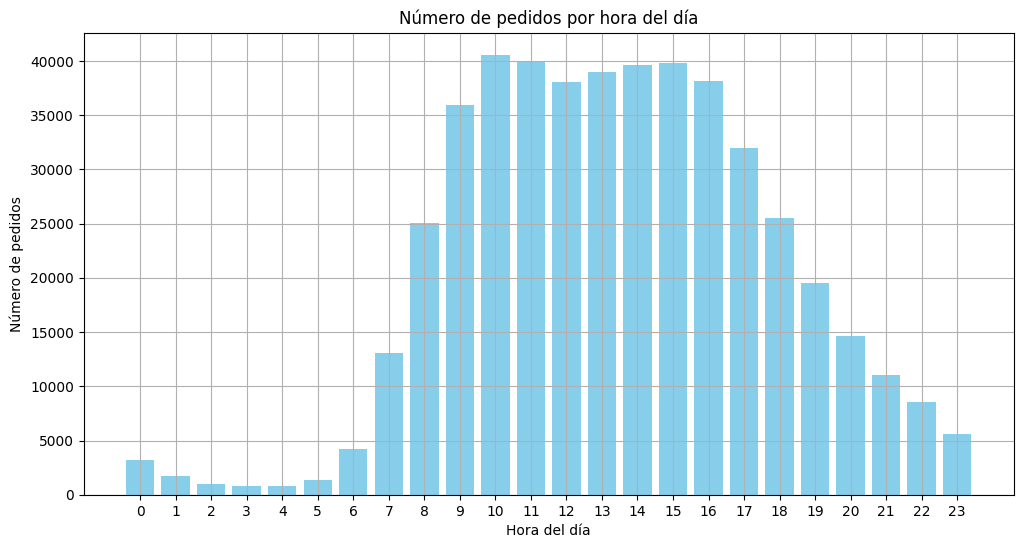

In [603]:
hourly_orders = instacart['order_hour_of_day'].value_counts().sort_index()

# Graficar
plt.figure(figsize=(12, 6))
plt.bar(hourly_orders.index, hourly_orders.values, color='skyblue')
plt.xlabel('Hora del día')
plt.ylabel('Número de pedidos')
plt.title('Número de pedidos por hora del día')
plt.xticks(range(24))  # Asegura que todos los valores de 0 a 23 estén en el eje x
plt.grid(True)
plt.show()


### Repaso adicional Francisco Benavides

<Axes: title={'center': 'Número de pedidos por hora del día'}, xlabel='Hora del día', ylabel='Número de pedidos'>

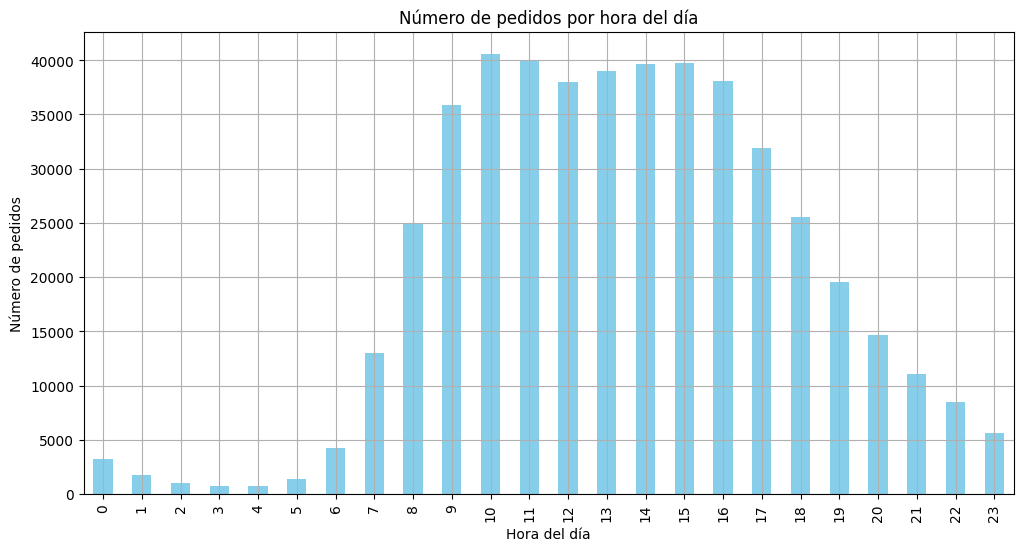

In [604]:
#Dentro del df agrupamos con respecto de 'order_hour_of_day' y posteriormente contamos los usuarios de 'user_id' 
instacart.groupby('order_hour_of_day')['user_id'].count().plot(
    kind='bar',
    color='skyblue',
    xlabel='Hora del día',
    ylabel='Número de pedidos',
    title='Número de pedidos por hora del día',
    figsize=(12, 6),
    grid=True,
    xticks= range(24),
)

Escribe aquí tus conclusiones
Se puede observar que la hora mas demandande para pedir comida son las 10am y la demanda de pedidos de comida se da de las 10am a 1pm  

### [A3] ¿Qué día de la semana compran víveres las personas?

Index([0, 1, 2, 3, 4, 5, 6], dtype='int64', name='order_dow')
[84090 82185 65833 60897 59810 63488 62649]
order_dow
0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: count, dtype: int64


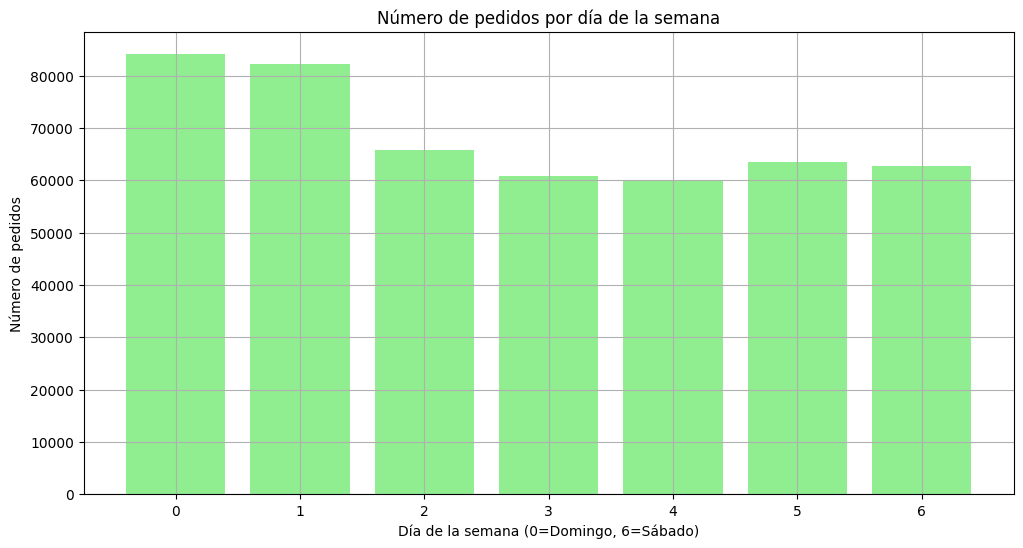

In [605]:
# Contar los pedidos por cada día de la semana
weekly_orders = instacart['order_dow'].value_counts().sort_index()

print(weekly_orders.index)
print(weekly_orders.values)
print(weekly_orders)
# Graficar
plt.figure(figsize=(12, 6))
plt.bar(weekly_orders.index, weekly_orders.values, color='lightgreen')
plt.xlabel('Día de la semana (0=Domingo, 6=Sábado)')
plt.ylabel('Número de pedidos')
plt.title('Número de pedidos por día de la semana')
plt.xticks(range(7))  # Asegurar que todos los valores de 0 a 6 estén en el eje x
plt.grid(True)
plt.show()

### Repaso con el profesor Francisco benavides

<Axes: title={'center': 'Número de pedidos por día de la semana'}, xlabel='Día de la semana (0=Domingo, 6=Sábado)', ylabel='Número de pedidos'>

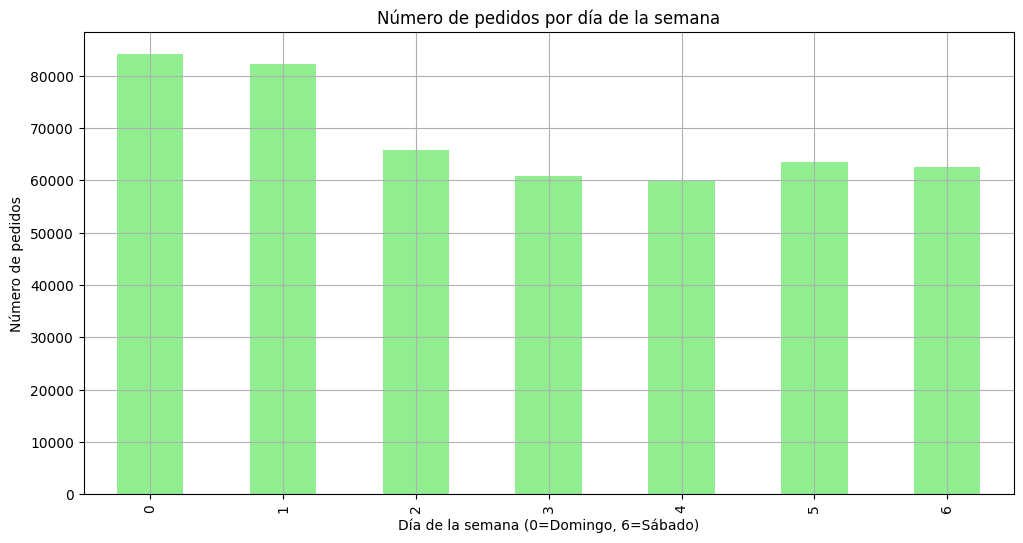

In [606]:
a = instacart.groupby('order_dow')['user_id'].count()
a.plot(
    figsize=(12, 6),
    kind='bar',
    color='lightgreen',
    xlabel='Día de la semana (0=Domingo, 6=Sábado)',
    ylabel='Número de pedidos',
    title='Número de pedidos por día de la semana',
    grid=True
)

Escribe aquí tus conclusiones 
Aqui podemos ver que el dia domingo es el dia que se utilza para poder hacer las compras esto podria ser a que muchas familias ocupan ese dia d descanso o ese mismo dia hacen de comer para su semana 

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

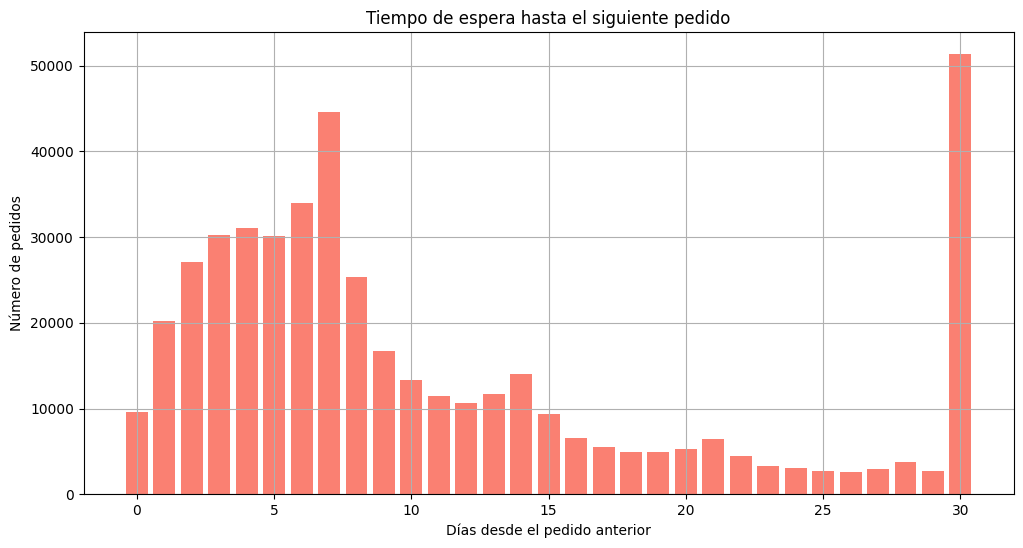

Valor mínimo: 0.0, Valor máximo: 30.0


In [607]:
# Contar los días desde el pedido anterior
days_since_last_order = instacart['days_since_prior_order'].value_counts().sort_index()

# Graficar
plt.figure(figsize=(12, 6))
plt.bar(days_since_last_order.index, days_since_last_order.values, color='salmon')
plt.xlabel('Días desde el pedido anterior')
plt.ylabel('Número de pedidos')
plt.title('Tiempo de espera hasta el siguiente pedido')
plt.grid(True)
plt.show()

# Valores mínimos y máximos
min_days = instacart['days_since_prior_order'].min()
max_days = instacart['days_since_prior_order'].max()
print(f"Valor mínimo: {min_days}, Valor máximo: {max_days}")

### Repaso con el profesor

<Axes: title={'center': 'Tiempo de espera hasta el siguiente pedido'}, xlabel='Días desde el pedido anterior', ylabel='Número de pedidos'>

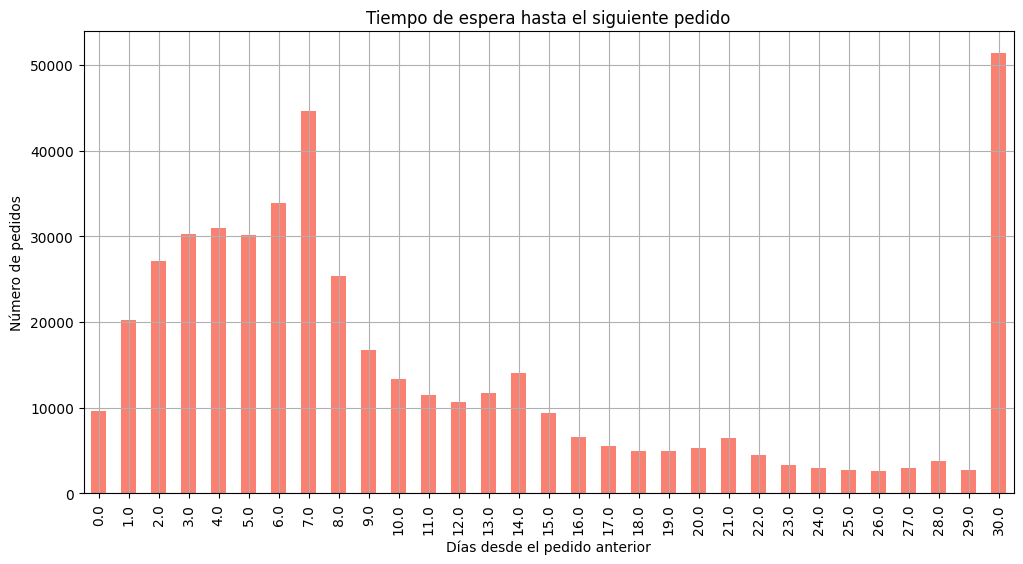

In [608]:
instacart.groupby('days_since_prior_order')['user_id'].count().sort_index().plot(
kind='bar',
figsize=(12, 6),
color='salmon',
xlabel='Días desde el pedido anterior',
ylabel='Número de pedidos',
title='Tiempo de espera hasta el siguiente pedido',
grid=True
)

Escribe aquí tus conclusiones

Podemos observar que mas de 5000 personas tratan de hacer un peido de para todo el mes asi no estan perdiendo tanto tiempo en la los fines de semana haciendo compras fisicas 

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
Has realizado un análisis sólido al verificar que los valores en `order_hour_of_day` y `order_dow` estén dentro de los rangos esperados (0-23 y 0-6, respectivamente). Creaste gráficos de barras efectivos para mostrar la distribución de pedidos por hora del día y por día de la semana, destacando que la mayoría de los pedidos se realizan entre las 9 AM y las 5 PM, con picos a las 10 AM y 3 PM. Estos insights son importantes para entender el comportamiento de los usuarios, y los has comunicado de manera clara y efectiva. ¡Muy buen trabajo!
</div>

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [609]:
instacart.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order'],
      dtype='object')

In [610]:
# Filtrar pedidos para miércoles (order_dow == 3)
wednesday_orders = instacart[instacart['order_dow'] == 3]['order_hour_of_day']

In [611]:
# y sábados (order_dow == 1)
saturday_orders = instacart[instacart['order_dow'] == 6]['order_hour_of_day']

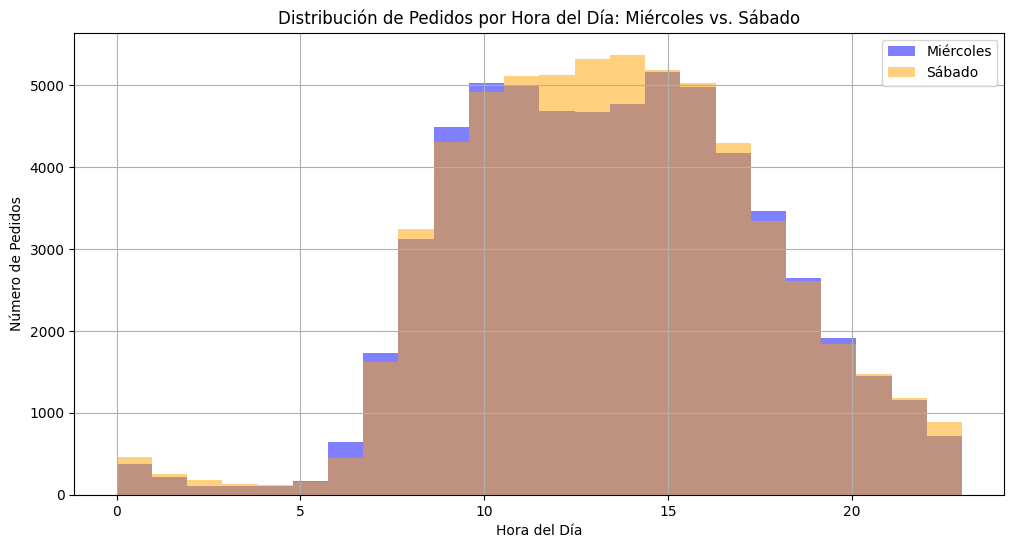

In [612]:
# Crear gráficos de barra
plt.figure(figsize=(12, 6))
plt.hist(wednesday_orders, bins=24, alpha=0.5, label='Miércoles', color='blue')
plt.hist(saturday_orders, bins=24, alpha=0.5, label='Sábado', color='orange')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Pedidos')
plt.title('Distribución de Pedidos por Hora del Día: Miércoles vs. Sábado')
plt.legend()
plt.grid(True)
plt.show()

### Repaso con el Profesor

<Axes: xlabel='order_hour_of_day'>

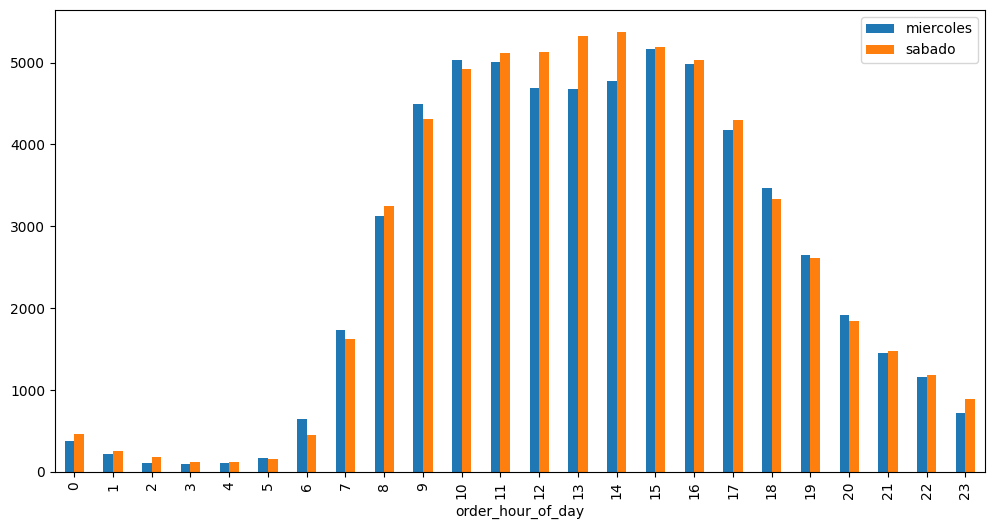

In [613]:
#primer paso es filtrar en instacart por order_dow el dia especifico que quiero, 
data_mircoles= instacart[instacart['order_dow']==3].groupby('order_hour_of_day')['order_id'].count()
data_sabado= instacart[instacart['order_dow']==6].groupby('order_hour_of_day')['order_id'].count()
#juntamos los dos series y le decimos con axis que los junte por columnas
grafico= pd.concat([data_mircoles,data_sabado],axis=1)
grafico.columns=['miercoles','sabado']
grafico.plot(kind='bar',figsize=(12, 6))
#print(data_mircoles)


In [614]:
#nw= instacart[instacart['order_dow']==3]['order_hour_of_day'].value_counts().sort_index()
#print(nw)
#nw.plot(kind='bar')

Escribe aquí tus conclusiones
Lagente prefiere comprar el fin de semana que a mitad de semana 

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [615]:
# Contar el número de pedidos por cada usuario
order_counts = instacart.groupby('user_id')['order_number'].max()

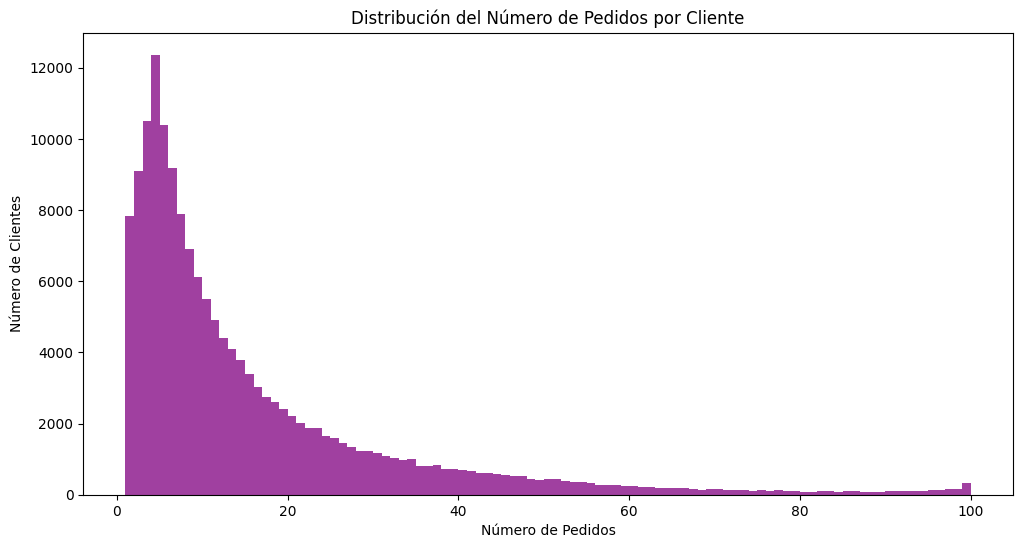

In [616]:
# Graficar la distribución de los conteos de pedidos
plt.figure(figsize=(12, 6))
plt.hist(order_counts, bins=range(1, order_counts.max() + 1), alpha=0.75, color='purple')
plt.xlabel('Número de Pedidos')
plt.ylabel('Número de Clientes')
plt.title('Distribución del Número de Pedidos por Cliente')
plt.show()

### Repaso con el profesor

<Axes: ylabel='Frequency'>

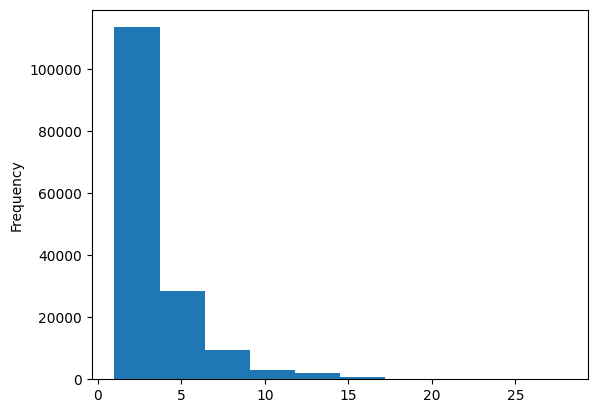

In [617]:
instacart.groupby('user_id')['order_id'].count().plot(kind='hist')

In [618]:
#instacart[instacart['order_id']]['user_id'].count().plot(kind='hist')

Escribe aquí tus conclusiones

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [619]:
# Contar el número de veces que se pide cada producto
product_counts = order_products['product_id'].value_counts().head(20)

In [620]:
# Obtener los nombres de los productos más pedidos
top_products = product_counts.index
top_product_names = products[products['product_id'].isin(top_products)]

In [621]:
# Mostrar los 20 productos más pedidos junto con su nombre
top_product_info = top_product_names.merge(product_counts.rename('count'), left_on='product_id', right_index=True)
print(top_product_info.sort_values(by='count', ascending=False))

       product_id              product_name  aisle_id  department_id  count
24851       24852                    Banana        24              4  66050
13175       13176    Bag of Organic Bananas        24              4  53297
21136       21137      Organic Strawberries        24              4  37039
21902       21903      Organic Baby Spinach       123              4  33971
47208       47209      Organic Hass Avocado        24              4  29773
47765       47766           Organic Avocado        24              4  24689
47625       47626               Large Lemon        24              4  21495
16796       16797              Strawberries        24              4  20018
26208       26209                     Limes        24              4  19690
27844       27845        Organic Whole Milk        84             16  19600
27965       27966       Organic Raspberries       123              4  19197
22934       22935      Organic Yellow Onion        83              4  15898
24963       

### Repaso con el Porfesor francisco


In [622]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


In [623]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [624]:
info_products= order_products.merge(products, on='product_id')
info_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17,0,Chicken Breast Tenders Breaded,129,1
1,567889,1560,1,1,Bag Of Ice,37,1
2,2261212,26683,1,1,Cafe Latte Pure Lightly Sweetened Iced Coffee ...,91,16
3,491251,8670,35,1,Diced Tomatoes,81,15
4,2571142,1940,5,1,Organic 2% Reduced Fat Milk,84,16


In [625]:
info_products.groupby(['product_id','product_name'])['order_id'].count().sort_values(ascending=False).head(20)

product_id  product_name            
24852       Banana                      66050
13176       Bag of Organic Bananas      53297
21137       Organic Strawberries        37039
21903       Organic Baby Spinach        33971
47209       Organic Hass Avocado        29773
47766       Organic Avocado             24689
47626       Large Lemon                 21495
16797       Strawberries                20018
26209       Limes                       19690
27845       Organic Whole Milk          19600
27966       Organic Raspberries         19197
22935       Organic Yellow Onion        15898
24964       Organic Garlic              15292
45007       Organic Zucchini            14584
39275       Organic Blueberries         13879
49683       Cucumber Kirby              13675
28204       Organic Fuji Apple          12544
5876        Organic Lemon               12232
8277        Apple Honeycrisp Organic    11993
40706       Organic Grape Tomatoes      11781
Name: order_id, dtype: int64

Podemos ver que la gente tiene una tendencia a pedir comida organica , podria ser por estilo de vida 

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
César, has demostrado un buen dominio de las técnicas de análisis en la Sección B. Comparaste correctamente las distribuciones de `order_hour_of_day` entre miércoles y sábados, mostrando cómo los patrones de compra varían entre estos dos días. Además, analizaste la distribución del número de pedidos por cliente, lo que proporciona información valiosa sobre los hábitos de compra. Identificaste también los 20 productos más populares, y aunque la guía sugiere la creación de gráficos de barras, tu enfoque sigue siendo válido para destacar los productos más comprados. ¡Gran trabajo en esta sección intermedia del análisis!
</div>

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [626]:
# Contar el número de artículos por cada 'order_id'
items_per_order = order_products.groupby('order_id').size()

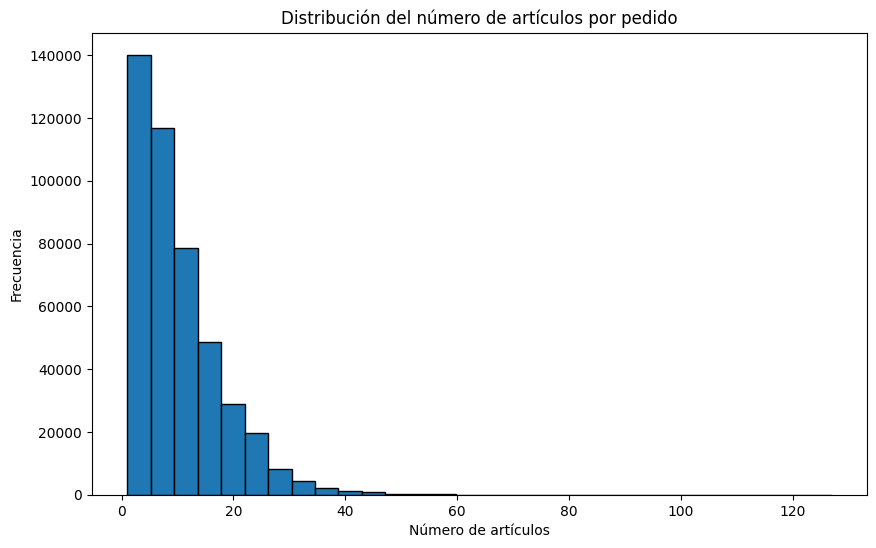

In [627]:
plt.figure(figsize=(10,6))
plt.hist(items_per_order, bins=30, edgecolor='black')
plt.title('Distribución del número de artículos por pedido')
plt.xlabel('Número de artículos')
plt.ylabel('Frecuencia')
plt.show()

### Repaso porfesor Francisco 

<Axes: ylabel='Frequency'>

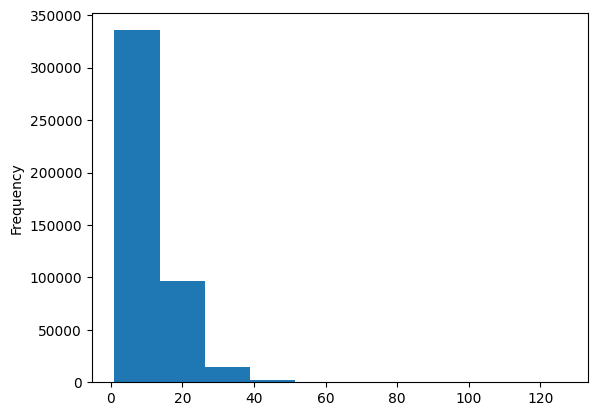

In [628]:
order_products.groupby('order_id')['product_id'].count().plot(kind='hist')

Podemos ver que son entre 4 o 5 productos son los que compran normalmente , 
que a pesar de que son organicos no los consumen tanto

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [629]:
# Filtrar productos reordenados y contar su frecuencia
top_reordered_products = order_products[order_products['reordered'] == 1]['product_id'].value_counts().head(20)
print(top_reordered_products)

product_id
24852    55763
13176    44450
21137    28639
21903    26233
47209    23629
47766    18743
27845    16251
47626    15044
27966    14748
16797    13945
26209    13327
22935    11145
24964    10411
45007    10076
49683     9538
28204     8989
8277      8836
39275     8799
5876      8412
49235     8389
Name: count, dtype: int64


In [630]:
# Obtener los nombres de los productos a partir del DataFrame 'products'
top_reordered_products = top_reordered_products.reset_index()
print(top_reordered_products)

    product_id  count
0        24852  55763
1        13176  44450
2        21137  28639
3        21903  26233
4        47209  23629
5        47766  18743
6        27845  16251
7        47626  15044
8        27966  14748
9        16797  13945
10       26209  13327
11       22935  11145
12       24964  10411
13       45007  10076
14       49683   9538
15       28204   8989
16        8277   8836
17       39275   8799
18        5876   8412
19       49235   8389


In [631]:
top_reordered_products.columns = ['product_id', 'count']

In [632]:
top_reordered_products = top_reordered_products.merge(products[['product_id', 'product_name']], on='product_id')
print(top_reordered_products)

    product_id  count              product_name
0        24852  55763                    Banana
1        13176  44450    Bag of Organic Bananas
2        21137  28639      Organic Strawberries
3        21903  26233      Organic Baby Spinach
4        47209  23629      Organic Hass Avocado
5        47766  18743           Organic Avocado
6        27845  16251        Organic Whole Milk
7        47626  15044               Large Lemon
8        27966  14748       Organic Raspberries
9        16797  13945              Strawberries
10       26209  13327                     Limes
11       22935  11145      Organic Yellow Onion
12       24964  10411            Organic Garlic
13       45007  10076          Organic Zucchini
14       49683   9538            Cucumber Kirby
15       28204   8989        Organic Fuji Apple
16        8277   8836  Apple Honeycrisp Organic
17       39275   8799       Organic Blueberries
18        5876   8412             Organic Lemon
19       49235   8389       Organic Half

### Repaso con el profesor Francisco

In [633]:
#utilizamos el df que creamos en B3 para poder solventar este ejercicio
df_reorder=info_products[info_products['reordered'] == 1]
df_reorder.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
1,567889,1560,1,1,Bag Of Ice,37,1
2,2261212,26683,1,1,Cafe Latte Pure Lightly Sweetened Iced Coffee ...,91,16
3,491251,8670,35,1,Diced Tomatoes,81,15
4,2571142,1940,5,1,Organic 2% Reduced Fat Milk,84,16
5,2456893,21616,4,1,Organic Baby Arugula,123,4


In [634]:
df_reorder.groupby(['product_id','product_name'])['order_id'].count().sort_values(ascending=False).head(20)

product_id  product_name            
24852       Banana                      55763
13176       Bag of Organic Bananas      44450
21137       Organic Strawberries        28639
21903       Organic Baby Spinach        26233
47209       Organic Hass Avocado        23629
47766       Organic Avocado             18743
27845       Organic Whole Milk          16251
47626       Large Lemon                 15044
27966       Organic Raspberries         14748
16797       Strawberries                13945
26209       Limes                       13327
22935       Organic Yellow Onion        11145
24964       Organic Garlic              10411
45007       Organic Zucchini            10076
49683       Cucumber Kirby               9538
28204       Organic Fuji Apple           8989
8277        Apple Honeycrisp Organic     8836
39275       Organic Blueberries          8799
5876        Organic Lemon                8412
49235       Organic Half & Half          8389
Name: order_id, dtype: int64

Podemos ver que se sigue pidiendo bannas y el paquete de bannas 

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [635]:
# Contar el número total de veces que se pidió cada producto
total_orders_per_product = order_products['product_id'].value_counts()

In [636]:
# Contar el número de veces que cada producto fue reordenado
reordered_per_product = order_products[order_products['reordered'] == 1]['product_id'].value_counts()

In [637]:
# Calcular la tasa de repetición
reorder_rate = (reordered_per_product / total_orders_per_product).fillna(0)
#reorder_rate = reorder_rate.to_frame().reset_index()
reorder_rate.columns = ['product_id', 'reorder_rate']

# Mostrar las tasas de repetición
print(reorder_rate.head(20))

product_id
1     0.564286
2     0.000000
3     0.738095
4     0.510204
7     0.500000
8     0.315789
9     0.761905
10    0.448071
11    0.625000
12    0.390244
13    0.500000
14    0.000000
17    0.000000
18    0.533333
19    0.000000
21    0.000000
22    0.500000
23    0.380952
24    0.000000
25    0.674576
Name: count, dtype: float64


### Repaso con el profesor

In [638]:
df_proporcion_reorder = order_products.groupby('product_id').agg(
    total_orders = ('order_id','count'),
    total_reorder = ('reordered','sum'),
    #proporcion = ('reordered', 'mean')
)
df_proporcion_reorder
#recuerda que tienen que ser columnas dentro de el 

,total_orders,total_reorder
product_id,,
1,280,158
2,11,0
3,42,31
4,49,25
7,2,1
...,...,...
49690,5,4
49691,72,31
49692,12,5


In [639]:
df_proporcion_reorder['proporcion']= df_proporcion_reorder['total_reorder'] / df_proporcion_reorder['total_orders']
df_proporcion_reorder

,total_orders,total_reorder,proporcion
product_id,,,
1,280,158,0.564286
2,11,0,0.000000
3,42,31,0.738095
4,49,25,0.510204
7,2,1,0.500000
...,...,...,...
49690,5,4,0.800000
49691,72,31,0.430556
49692,12,5,0.416667


Escribe aquí tus conclusiones
hay que recordar que estan en porcentajes esos valores 1 .5642 = 1 56.42%


### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [640]:
# Contar el número total de productos pedidos por cada usuario
total_orders_per_user = order_products.groupby('order_id')['product_id'].count()

In [641]:
# Contar el número de productos reordenados por cada usuario
reordered_per_user = order_products[order_products['reordered'] == 1].groupby('order_id')['product_id'].count()

# Calcular la tasa de repetición por usuario
reorder_rate_per_user = (reordered_per_user / total_orders_per_user).fillna(0)
#reorder_rate_per_user = reorder_rate_per_user.to_frame().reset_index()
reorder_rate_per_user.columns = ['order_id', 'reorder_rate']

# Mostrar las tasas de repetición por usuario
print(reorder_rate_per_user.head(20))

order_id
4      0.923077
9      0.666667
11     1.000000
19     1.000000
20     0.000000
31     0.900000
48     0.250000
56     0.700000
61     0.916667
68     0.666667
75     0.000000
80     0.857143
81     0.818182
83     0.357143
99     0.285714
114    0.000000
131    0.777778
142    1.000000
143    0.600000
148    0.714286
Name: product_id, dtype: float64


Escribe aquí tus conclusiones

### Repaso profesor

In [642]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


In [643]:
instacart.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [644]:
df_proporcion_clientes = order_products.merge(instacart, on='order_id')
df_proporcion_clientes.groupby('user_id')['reordered'].mean()

user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 149626, dtype: float64

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [645]:
# Filtrar los productos que fueron el primer artículo en el carrito
first_item_products = order_products[order_products['add_to_cart_order'] == 1]['product_id'].value_counts().head(20)

In [646]:
# Obtener los nombres de los productos a partir del DataFrame 'products'
first_item_products = first_item_products.to_frame().reset_index()
first_item_products.columns = ['product_id', 'count']
first_item_products = first_item_products.merge(products[['product_id', 'product_name']], on='product_id')

In [647]:
print(first_item_products)

    product_id  count                 product_name
0        24852  15562                       Banana
1        13176  11026       Bag of Organic Bananas
2        27845   4363           Organic Whole Milk
3        21137   3946         Organic Strawberries
4        47209   3390         Organic Hass Avocado
5        21903   3336         Organic Baby Spinach
6        47766   3044              Organic Avocado
7        19660   2336                 Spring Water
8        16797   2308                 Strawberries
9        27966   2024          Organic Raspberries
10       44632   1914   Sparkling Water Grapefruit
11       49235   1797          Organic Half & Half
12       47626   1737                  Large Lemon
13         196   1733                         Soda
14       38689   1397     Organic Reduced Fat Milk
15       26209   1370                        Limes
16       12341   1340                Hass Avocados
17        5785   1310  Organic Reduced Fat 2% Milk
18       27086   1309          

### Repaso con profesor

In [648]:
df_primer_product=info_products[info_products['add_to_cart_order'] == 1]

In [649]:
df_primer_product.groupby(['product_id','product_name'])['order_id'].count().sort_values(ascending=False).head(20)

product_id  product_name               
24852       Banana                         15562
13176       Bag of Organic Bananas         11026
27845       Organic Whole Milk              4363
21137       Organic Strawberries            3946
47209       Organic Hass Avocado            3390
21903       Organic Baby Spinach            3336
47766       Organic Avocado                 3044
19660       Spring Water                    2336
16797       Strawberries                    2308
27966       Organic Raspberries             2024
44632       Sparkling Water Grapefruit      1914
49235       Organic Half & Half             1797
47626       Large Lemon                     1737
196         Soda                            1733
38689       Organic Reduced Fat Milk        1397
26209       Limes                           1370
12341       Hass Avocados                   1340
5785        Organic Reduced Fat 2% Milk     1310
27086       Half & Half                     1309
22935       Organic Yellow On

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
Te has enfrentado a tareas más complejas y las has manejado bien. Calculaste con precisión el número típico de artículos por pedido y analizaste la distribución resultante, lo cual es crucial para entender el comportamiento de los clientes en la plataforma. También identificaste los 20 artículos más reordenados, utilizando correctamente la técnica de filtrado y combinación de DataFrames. Finalmente, calculaste la proporción de reorden tanto por producto como por cliente, lo que proporciona una visión profunda de la lealtad del cliente y las preferencias de compra. ¡Has hecho un trabajo excelente en esta sección difícil del proyecto!
</div>

Escribe aquí tus conclusiones

### Conclusion general del proyecto:

La gente esta teniendo una tendencia a pedir cosas mas saludables para poder comer 

<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
César, has hecho un excelente trabajo en el análisis de datos, pero te sugiero que en las conclusiones vayas un paso más allá al conectar los insights obtenidos con posibles aplicaciones prácticas o decisiones estratégicas. Por ejemplo, podrías discutir cómo los patrones de compra identificados pueden influir en la planificación del inventario, o cómo el conocimiento de los productos más reordenados podría ayudar a personalizar las ofertas para los clientes. Este enfoque hará que tus conclusiones sean aún más impactantes y relevantes para un contexto de negocios. ¡Sigue adelante, estás haciendo un gran trabajo!
</div>